In [1]:
import pandas as pd
df = pd.read_parquet("GUIDE_train_Feature_engineered_2.parquet")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation set distribution:")
print(y_test.value_counts(normalize=True))

Training set distribution:
IncidentGrade
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Validation set distribution:
IncidentGrade
2    0.333334
0    0.333333
1    0.333333
Name: proportion, dtype: float64


In [4]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Hashing the FullFilePath column
# hasher = FeatureHasher(n_features=20, input_type='string')
# hashed_features = hasher.fit_transform(df['FullFilePath'].astype(str))
# hashed_features_df = pd.DataFrame(hashed_features.toarray())

# # Combine hashed features with the original DataFrame
# df_encoded = pd.concat([df.drop(columns=['FullFilePath']), hashed_features_df], axis=1)

# Train Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.896657347467641


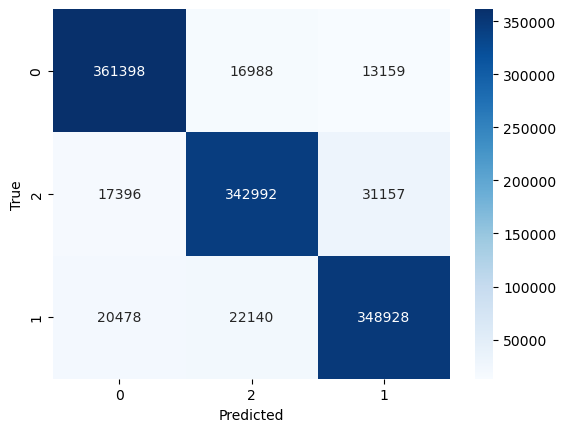

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.91      0.92      0.91    391545
           1       0.90      0.88      0.89    391545
           2       0.89      0.89      0.89    391546

    accuracy                           0.90   1174636
   macro avg       0.90      0.90      0.90   1174636
weighted avg       0.90      0.90      0.90   1174636



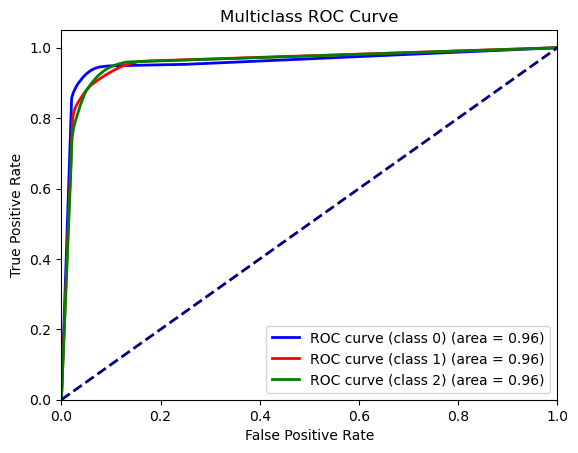

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for ROC curve calculation
y_bin = label_binarize(y_test, classes=clf.classes_)
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_prob[:, i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors if more classes
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [22]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                         Feature  Importance
1                     DetectorId    0.267081
9                    AccountName    0.250734
5                      IpAddress    0.082471
2                     AlertTitle    0.068720
10                    DeviceName    0.050454
..                           ...         ...
50  EntityType_ContainerRegistry    0.000000
49     EntityType_ContainerImage    0.000000
48          EntityType_Container    0.000000
41     EntityType_AmazonResource    0.000000
38        Category_Weaponization    0.000000

[76 rows x 2 columns]


In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.89750272 0.89721497 0.89722774 0.89712634 0.89748135]
Mean CV score: 0.897310621266109


In [ ]:
# Your Random Forest model seems to be performing quite well based on the metrics provided. Here’s a detailed evaluation:

# ### 1. **Accuracy**
# - **Accuracy:** 0.8967
#   - This is a strong accuracy score, indicating that the model is correctly classifying about 90% of the samples.

# ### 2. **Classification Report**
# - **Precision, Recall, F1-Score:** All are high across all classes.
#   - **Precision:** Measures the accuracy of the positive predictions. High values for all classes indicate that when the model predicts a class, it is often correct.
#   - **Recall:** Measures how well the model captures all positive cases of each class. High values suggest that the model is good at identifying instances of each class.
#   - **F1-Score:** The harmonic mean of precision and recall. High values indicate a good balance between precision and recall.

# ### 3. **ROC Curve and AUC**
# - **ROC Curve (Class 0, 1, 2):** Area - 0.96
#   - The high ROC AUC scores (close to 1) for all classes suggest excellent performance in distinguishing between the classes.

# ### 4. **Cross-Validation Scores**
# - **Mean CV Score:** 0.8973
#   - Consistent cross-validation scores reinforce the model's robustness and generalizability across different data splits.

# ### 5. **Feature Importance**
# - **Top Features:**
#   - **DetectorId, AccountName, IpAddress** are the most important features, which makes sense if they have a significant impact on classification.
#   - Features with very low importance (close to zero) could potentially be removed to simplify the model.

# ### **Recommendations**

# 1. **Model Validation:**
#    - **Confusion Matrix:** Consider evaluating the confusion matrix to get a visual representation of misclassifications.
#    - **Classification Report:** You've already included this, which is great for detailed class-wise performance.

# 2. **Further Evaluation:**
#    - **Hyperparameter Tuning:** Random Forest models often benefit from hyperparameter tuning. Experiment with parameters like the number of trees (`n_estimators`), maximum depth (`max_depth`), and minimum samples per leaf (`min_samples_leaf`) to potentially improve performance.
#    - **Feature Engineering:** Based on feature importance, assess if you can engineer or select features to enhance model performance further.

# 3. **Feature Importance Analysis:**
#    - Features with very low importance might be candidates for removal to simplify the model and reduce computational complexity.

# 4. **Advanced Metrics:** 
#    - For a more comprehensive evaluation, consider metrics like Precision-Recall curves and average Precision for imbalanced datasets.

# Overall, your Random Forest model appears to be in good shape with high accuracy, precision, recall, and ROC AUC scores. It’s performing well across all classes and seems robust based on cross-validation results.